
# *Visualisation*


Why do we need to see the the data?

Just need a image for the report, right? - No!

You cannot even begin to analyse your data without seeing it. This is not Excel, there are no excuses.

We take the famous example first described by [Francis Anscombe in 1973](http://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf)

First we check the summary statistics

In [1]:
data("anscombe")

In [2]:
for(i in 1:4){
  tmp <- list(c(
         mean_x1 = mean(anscombe[,paste0("x",i)]), mean_y1 = mean(anscombe[,paste0("y",i)]), 
         var_x1 = var(anscombe[,paste0("x",i)]), var_y1 = var(anscombe[,paste0("y",i)]),
         cor_xy = cor(anscombe[,paste0("x",i)], anscombe[,paste0("y",i)]),
         intercept = as.numeric(lm(anscombe[,paste0("y",i)] ~ anscombe[,paste0("x",i)])$coef[1]),
         beta_x = as.numeric(lm(anscombe[,paste0("y",i)] ~ anscombe[,paste0("x",i)])$coef[2])
      )
    )
names(tmp) <- paste0("dataset:", i)
print(tmp)
}

$`dataset:1`
   mean_x1    mean_y1     var_x1     var_y1     cor_xy  intercept     beta_x 
 9.0000000  7.5009091 11.0000000  4.1272691  0.8164205  3.0000909  0.5000909 

$`dataset:2`
   mean_x1    mean_y1     var_x1     var_y1     cor_xy  intercept     beta_x 
 9.0000000  7.5009091 11.0000000  4.1276291  0.8162365  3.0009091  0.5000000 

$`dataset:3`
   mean_x1    mean_y1     var_x1     var_y1     cor_xy  intercept     beta_x 
 9.0000000  7.5000000 11.0000000  4.1226200  0.8162867  3.0024545  0.4997273 

$`dataset:4`
   mean_x1    mean_y1     var_x1     var_y1     cor_xy  intercept     beta_x 
 9.0000000  7.5009091 11.0000000  4.1232491  0.8165214  3.0017273  0.4999091 



All four datasets look identical, but - 

In [3]:
par(mfrow=c(2,2)) # we tell R to make space for four plots - two in the first row and two in the second

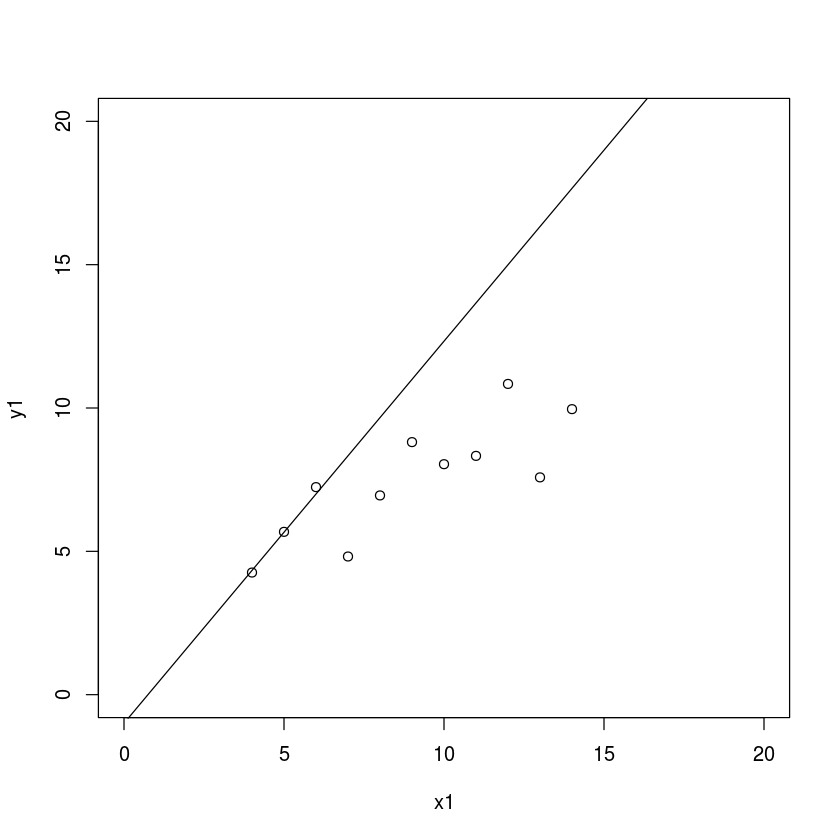

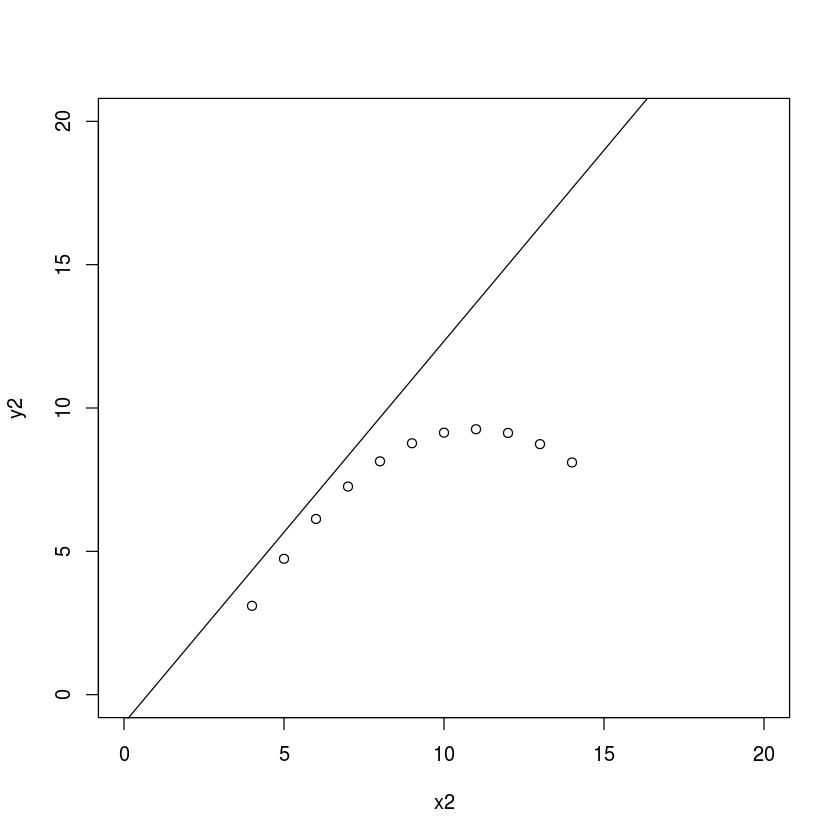

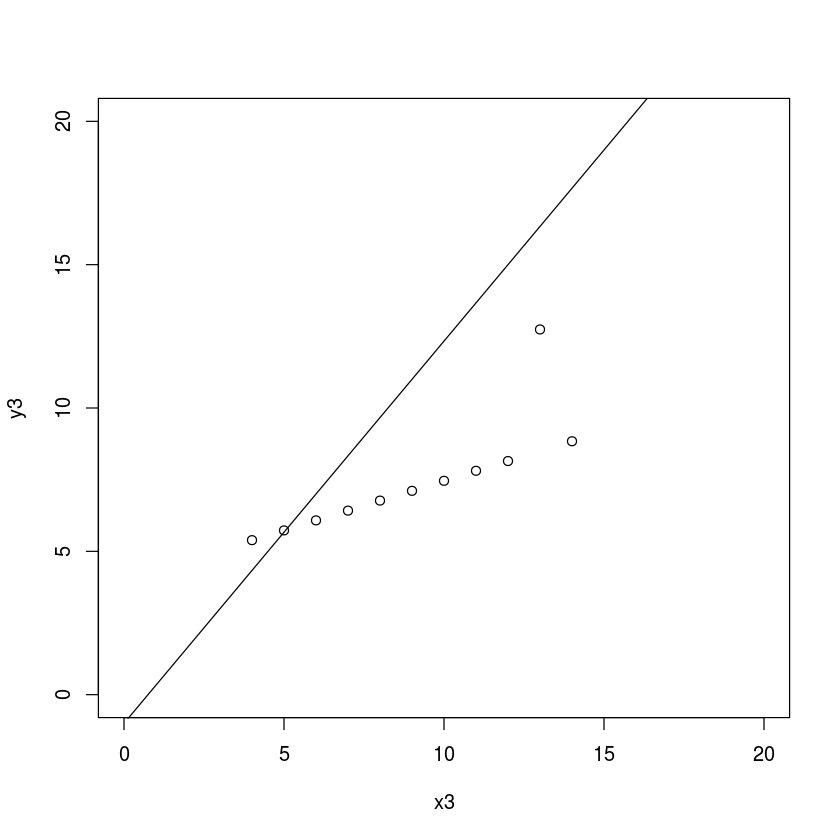

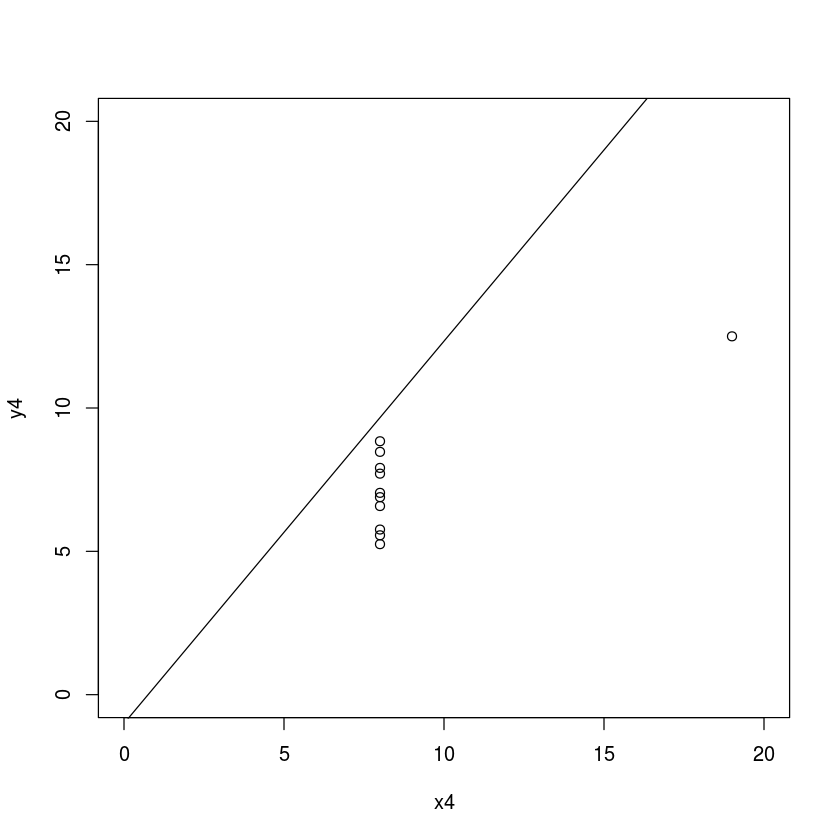

In [4]:
for(i in 1:4){

  plot(anscombe[,paste0("x",i)], anscombe[,paste0("y",i)], ylim = c(0,20), xlim = c(0,20), ylab = paste0("y",i), xlab = paste0("x", i))
  
  abline(lm(anscombe[,paste0("x",i)] ~ anscombe[,paste0("y",i)]))

  }


## Base Graphics


We have seen various types of plots today conveying information on one, two, or mutliple variables. In this section we will explore the vast possibilities available in the base graphics system. Many packages exist that create publication-ready plots, which will cover later, but whilst you in the exploration phase of your data analysis, you will undoubtly find the quick and dirty plots in the base system invaluable.


All graphical outputs are defined by high and low-level plotting commands, high level generate the plot and accepts arguements to control the appearence:

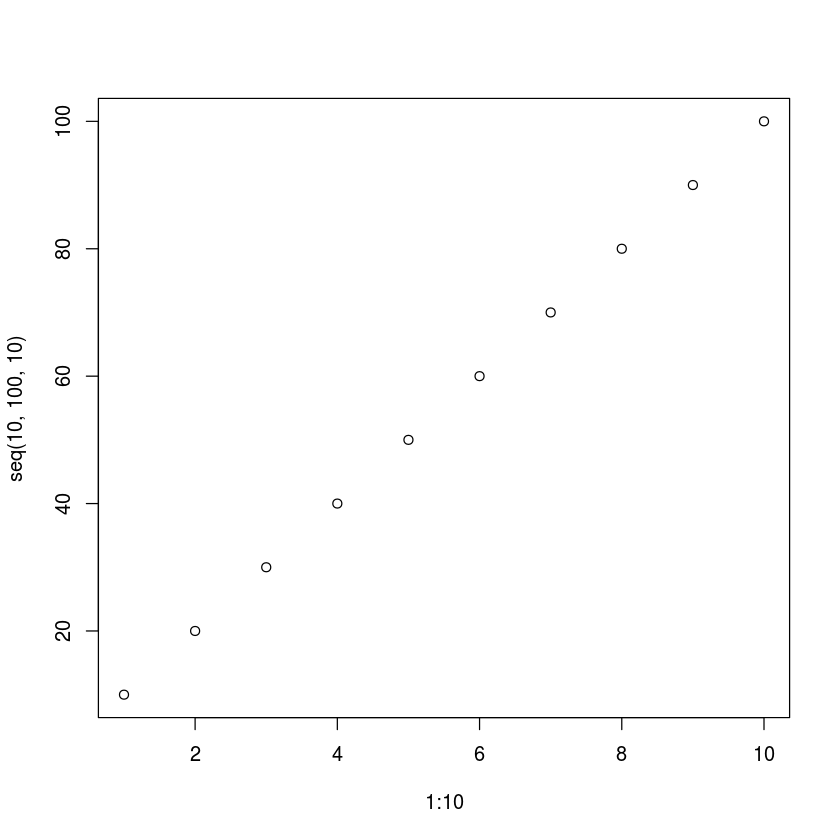

In [5]:
plot(1:10, seq(10,100,10))

After a plot has been called, low-level commands allow you to customise the plot:

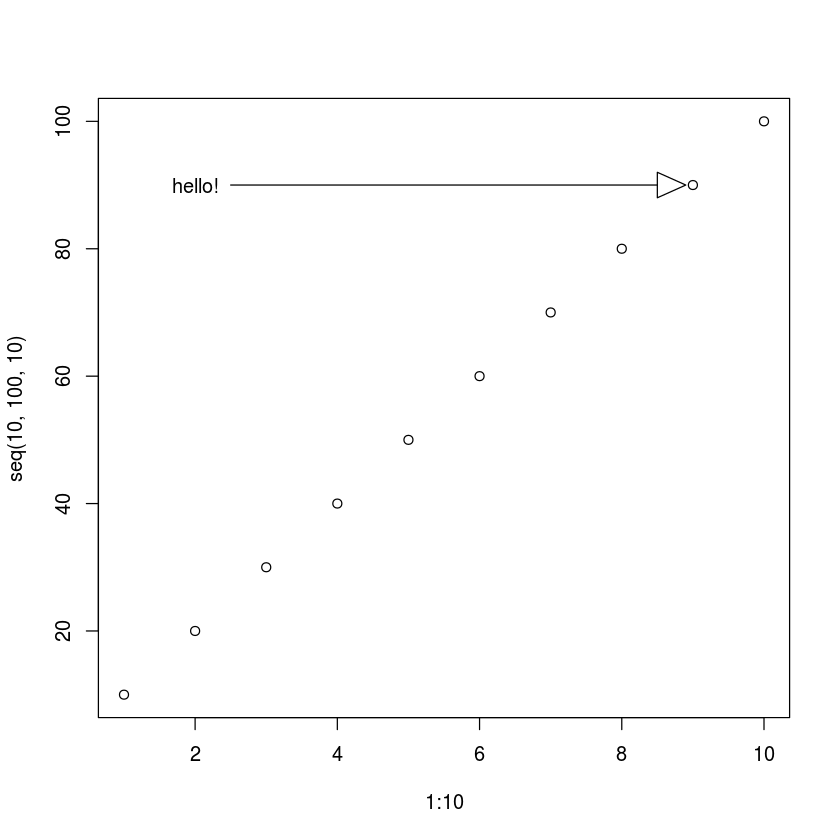

In [6]:
plot(1:10, seq(10,100,10))
text(x = 2, y = 90, "hello!")
lines(x = c(2.5,8.5), y = rep(90,2))
polygon(x = c(8.5,8.9,8.5), y = c(92,90,88))

We will go through each step of creating a good plot that can be applied to any of base graphics.

In [ ]:
plot(blood.pressure$diastolic, blood.pressure$systolic)

In [ ]:
The first thing that strikes us is that we are missing a title, you can add a title within the plot function itself or a low-level function. To show these are identical we will add a title using both methods and plot them side by side using  the 'par' function

In [ ]:
par(mfrow=c(1,2)) 
plot(blood.pressure$diastolic, blood.pressure$systolic, main = "Systolic and Diastolic Blood Pressures")
plot(blood.pressure$diastolic, blood.pressure$systolic)
title("Systolic and Diastolic Blood Pressures\nLow Level")

In [ ]:
The 'par' function controls every aspect of a plot and not so secretely a list in disguise with all the graphical parameter values (72), which we can see and change to fit our needs

In [ ]:
head(par())

In [ ]:
Now that we have a title we should tidy up the axis labels, which again can be passed to either high or low-level plotting functions.

In [ ]:
plot(blood.pressure$diastolic, 
     blood.pressure$systolic, 
     main = "Systolic and Diastolic Blood Pressures", 
     ylab = "Systolic (mmHg)", 
     xlab = "Diastolic (mmHg)")

In [ ]:
What if your title or axis labels contained superscript/subscript characters or symbols? R treats all special characters, such as these and mathematical symbols, as expressions,

In [ ]:
plot(x = 1:12, y = (1:12)^2, main = expression(atop(y == x^2, x == sqrt(y))))

In [ ]:
Still the plot looks a bit bland we can add colour and change the shape of the plotting symbols.There are 657 colours and 256 plotting symbols to choose from in the base graphics system.

In [ ]:
par(mfrow=c(1,2)) 
plot(x = 1:12, y = (1:12)^2, main = expression(atop(y == x^2, x == sqrt(y))),
     col = "blue")
plot(x = 1:12, y = (1:12)^3, main = expression(atop(y == x^3, x == y^over(1,3))),
     col = "red", pch = 4)

In [ ]:
Maybe we are not happy with the limits of the x and y axes or how the axes are labelled:

In [ ]:
par(mfrow=c(2,2))

In [ ]:
# Standard
plot(x = 1:12, y = (1:12)^3, main = "Standard",
     col = "red", pch = 4)

In [ ]:
# Axis Limits & Title
plot(x = 1:12, y = (1:12)^3, main = "Y Axis Limits & Title",
     col = "red", pch = 4,
     ylim = c(0,2e3), xlim = c(0,13),
     yaxt="n", ylab = "") # don't draw or label the y axis
axis(side = 2, las = 1) # add the y axis
mtext(side = 2, line = 2.5, cex = 0.8, text = expression(y == x^3))


In [ ]:
# Axis Labels
plot(x = 1:12, y = (1:12)^3, main = "X Axis Labels",
     col = "red", pch = 4,
     xaxt="n", xlab = "") # don't draw or label the y axis
axis(side = 1, las = 2, at = 1:12, cex.axis=0.8, 
     labels = strftime(paste(sep="-", "2016", 1:12, 1), "%b")) # add the x axis


In [ ]:
# Adding curves
plot(x = 1:12, y = (1:12)^3, main = "Fitting a Curve",
     col = "red", pch = 4
)
lines(1:12, (1:12)^3, lty=1,col="blue")

In [ ]:

## Grammer of Graphics


In [ ]:

The [ggplot2](http://docs.ggplot2.org/current) package allows you to create very nice looking plots by
taking care of the many details invovled in creating publication-quality graphics. It does this by using a set of rules that govern how plots are built, the foundation is always the raw data, upon which you add layers of annotations and statistical summaries. 

In [ ]:
All ggplots have the following components:
  
1. Data
2. Aesthetics = visual attributes of the data points
3. Geometric objects = the type of plot
4. Statistical transformations
5. Scales = controls how the data are mapped to the aesthetics
6. Coordinate system = describes the space in which the data is projected.
7. Facets = the display of subsetted data

In [ ]:
Only the first three need to be explicity defined when creating a ggplot, the rest are controlled by by a heirarchy of defaults. A key distinction between base graphics and ggplot2 graphics is that once a plot is constructed you can modify existing content. 
